In [446]:
# library(SingleCellExperiment)
# library(scran)
# library(scater)

In [479]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/atlas_E8.5.Rds"

In [480]:
sce = readRDS(filename)
sce

class: SingleCellExperiment 
dim: 29452 20978 
metadata(1): log.exprs.offset
assays(2): counts logcounts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(3): ID Symbol SymbolUniq
colnames(20978): AAACATACCACTGA-17 AAACATTGCAACTG-17 ...
  TTTCTACTTCTCTA-37 TTTGCATGCTGATG-37
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [481]:
# make sure to remove pre-existing size factors, previously computed log counts
assay(sce, "logcounts") <- NULL
sizeFactors(sce) <- NULL

In [482]:
##### Note this step is hard-coded
# partial and full datasets might not and often will not be subsamples of a single sce object

In [483]:
### select samples
# will act as full dataset
sample1 = '17'
sce1 = sce[,sce$sample == sample1]
# will act as partial (incomplete) dataset
sample2 = '29'
sample2 = '36'
sce2 = sce[,sce$sample == sample2]

In [484]:
sce1
sce2

class: SingleCellExperiment 
dim: 29452 4483 
metadata(1): log.exprs.offset
assays(1): counts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(3): ID Symbol SymbolUniq
colnames(4483): AAACATACCACTGA-17 AAACATTGCAACTG-17 ...
  TTTGCATGAACGGG-17 TTTGCATGAGGAGC-17
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

class: SingleCellExperiment 
dim: 29452 4915 
metadata(1): log.exprs.offset
assays(1): counts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(3): ID Symbol SymbolUniq
colnames(4915): AAACATACTGCAGT-36 AAACATTGAGCAAA-36 ...
  TTTGACTGCAGCTA-36 TTTGACTGTTTACC-36
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [485]:
### select cell type
# table(colData(sce1)$celltype)[table(colData(sce1)$celltype)>10]
# table(colData(sce2)$celltype)[table(colData(sce2)$celltype)>10]

In [486]:
# celltype = 'Allantois'
# celltype = 'Cardiomyocytes'
# celltype = 'Endothelium'
# celltype = 'Erythroid3'
# celltype = 'Forebrain/Midbrain/Hindbrain'
# celltype = 'Gut'
# celltype = 'Neural crest'
celltype = 'Rostral neurectoderm'
# celltype = 'Spinal cord'

In [487]:
sce1 = sce1[,!(is.na(sce1$celltype)) &  sce1$celltype == celltype]
sce2 = sce2[,!(is.na(sce2$celltype)) &  sce2$celltype == celltype]

In [488]:
sce1
sce2

class: SingleCellExperiment 
dim: 29452 1 
metadata(1): log.exprs.offset
assays(1): counts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(3): ID Symbol SymbolUniq
colnames(1): TCAATCACCGTTGA-17
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

class: SingleCellExperiment 
dim: 29452 1 
metadata(1): log.exprs.offset
assays(1): counts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(3): ID Symbol SymbolUniq
colnames(1): GGACTATGGGTCAT-36
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [458]:
# use edgeR to compute (log2) CPM
sce = sce1
logcounts(sce) = edgeR::cpm(counts(sce), log = TRUE, prior.count = 0.1)

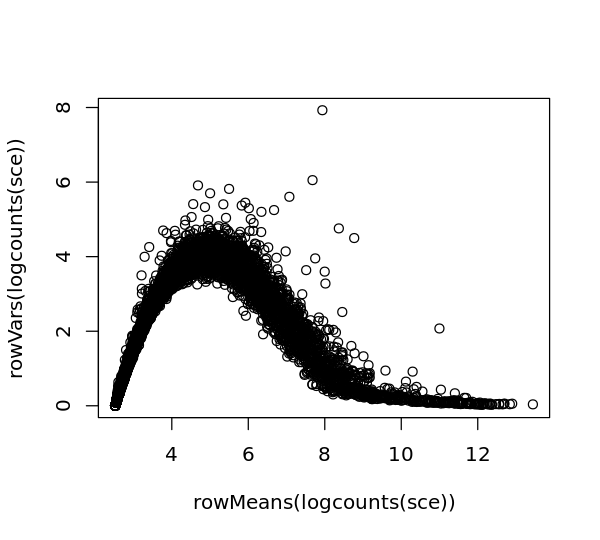

In [459]:
options(repr.plot.width = 5, repr.plot.height = 4.5)
plot(rowMeans(logcounts(sce)),rowVars(logcounts(sce)))

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

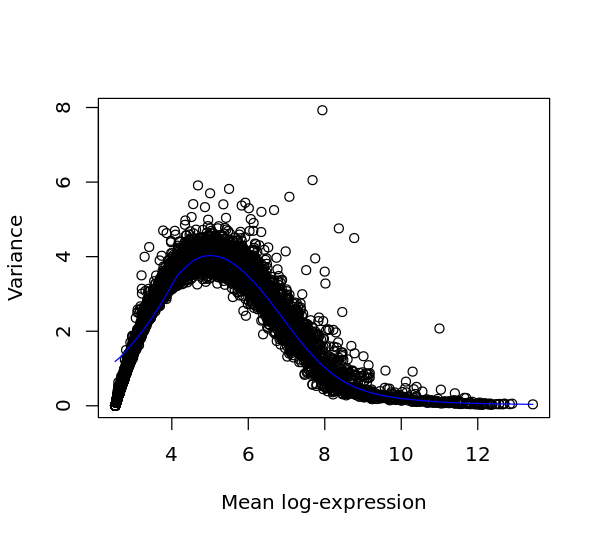

In [460]:
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [461]:
sce1 = sce

In [462]:
sce = sce2
logcounts(sce) = edgeR::cpm(counts(sce), log = TRUE, prior.count = 0.1)

In [463]:
sce

class: SingleCellExperiment 
dim: 29452 241 
metadata(1): log.exprs.offset
assays(2): counts logcounts
rownames(29452): ENSMUSG00000051951 ENSMUSG00000089699 ...
  ENSMUSG00000096730 ENSMUSG00000095742
rowData names(3): ID Symbol SymbolUniq
colnames(241): AAACATTGATGTCG-29 AAACTTGAAAACAG-29 ...
  TTGTCATGTGCAGT-29 TTTCTACTCGTGAT-29
colData names(30): Sample Barcode ... endo_gutDPT endo_gutCluster
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [464]:
dec2 <- scran::modelGeneVar(sce)

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

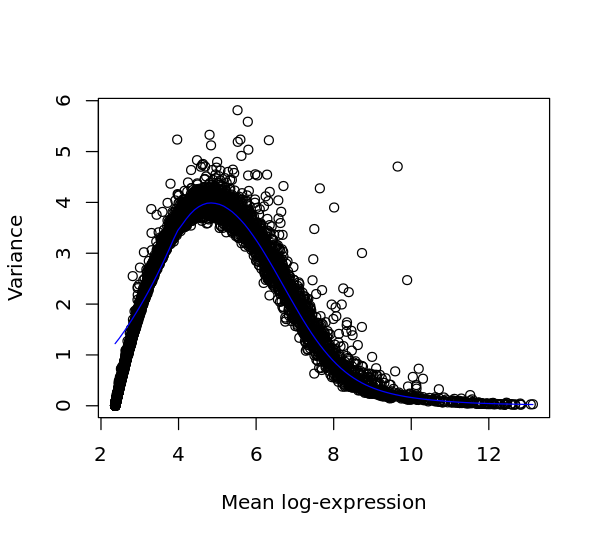

In [465]:
plot(dec2$mean, dec2$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec2)$trend(x), col="blue", add=TRUE)

In [466]:
dec = dec2
dec = dec[order(dec$mean),]

In [467]:
selected_genes = c(names(head(dec$mean[dec$mean>1],1)),
names(head(dec$mean[dec$mean>3],1)),
names(head(dec$mean[dec$mean>4],1)),
names(head(dec$mean[dec$mean>5],1)),
names(head(dec$mean[dec$mean>6],1)),
names(head(dec$mean[dec$mean>7.5],1)),
names(head(dec$mean[dec$mean>8],1)),
names(head(dec$mean[dec$mean>9],1)),
names(head(dec$mean[dec$mean>10],1)),
names(head(dec$mean[dec$mean>12],1)))
dec2 = dec
selected_genes

[1] "ENSMUSG00000051951" "ENSMUSG00000051220" "ENSMUSG00000035799"
 [4] "ENSMUSG00000016409" "ENSMUSG00000038388" "ENSMUSG00000013415"
 [7] "ENSMUSG00000032324" "ENSMUSG00000022193" "ENSMUSG00000031818"
[10] "ENSMUSG00000028081"

In [468]:
names(colData(sce))

[1] "Sample"              "Barcode"             "source"             
 [4] "barcode"             "sample"              "stage"              
 [7] "sequencing.batch"    "theiler"             "doub.density"       
[10] "doublet"             "cluster"             "cluster.sub"        
[13] "cluster.stage"       "cluster.theiler"     "stripped"           
[16] "celltype"            "colour"              "umapX"              
[19] "umapY"               "haem_gephiX"         "haem_gephiY"        
[22] "haem_subclust"       "endo_gephiX"         "endo_gephiY"        
[25] "endo_trajectoryName" "endo_trajectoryDPT"  "endo_gutX"          
[28] "endo_gutY"           "endo_gutDPT"         "endo_gutCluster"

In [469]:
## now actually make sce2 partial
# select down on only present genes
sce$total_counts = colSums(counts(sce))
head(sce$total_counts)
sce = sce[selected_genes,]
rowMeans(logcounts(sce))
# sce
assay(sce, "logcounts") <- NULL
sce

AAACATTGATGTCG-29 AAACTTGAAAACAG-29 AAATCAACCCAGTA-29 AAATCAACCGACAT-29 
            16760             18825             25634             26995 
AACCACGATGGCAT-29 AACCGATGAAGCCT-29 
            23116             19145

ENSMUSG00000051951 ENSMUSG00000051220 ENSMUSG00000035799 ENSMUSG00000016409 
          2.364289           3.000062           4.000107           5.000875 
ENSMUSG00000038388 ENSMUSG00000013415 ENSMUSG00000032324 ENSMUSG00000022193 
          6.002685           7.504470           8.006445           9.000996 
ENSMUSG00000031818 ENSMUSG00000028081 
         10.003359          12.004299

class: SingleCellExperiment 
dim: 10 241 
metadata(1): log.exprs.offset
assays(1): counts
rownames(10): ENSMUSG00000051951 ENSMUSG00000051220 ...
  ENSMUSG00000031818 ENSMUSG00000028081
rowData names(3): ID Symbol SymbolUniq
colnames(241): AAACATTGATGTCG-29 AAACTTGAAAACAG-29 ...
  TTGTCATGTGCAGT-29 TTTCTACTCGTGAT-29
colData names(31): Sample Barcode ... endo_gutCluster total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [470]:
# normalized.lib.sizes? (default = TRUE)
logcounts(sce) = edgeR::cpm(counts(sce), log = TRUE, lib.size = sce$total_counts, prior.count = 0.1)
rowMeans(logcounts(sce))

ENSMUSG00000051951 ENSMUSG00000051220 ENSMUSG00000035799 ENSMUSG00000016409 
          2.364289           3.000062           4.000107           5.000875 
ENSMUSG00000038388 ENSMUSG00000013415 ENSMUSG00000032324 ENSMUSG00000022193 
          6.002685           7.504470           8.006445           9.000996 
ENSMUSG00000031818 ENSMUSG00000028081 
         10.003359          12.004299

In [471]:
sce2 = sce

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

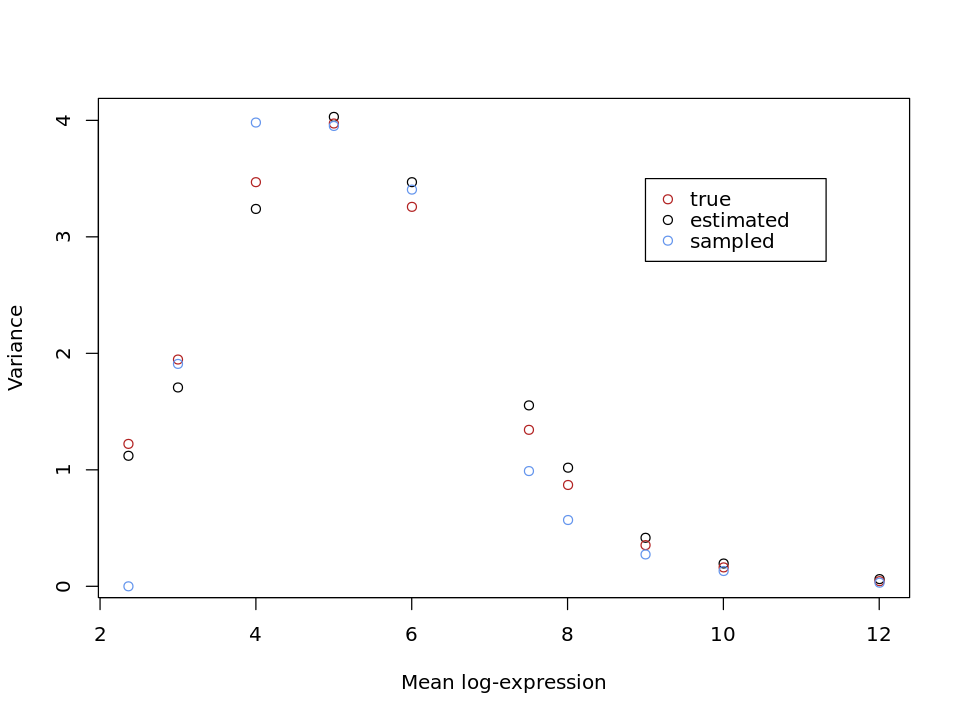

In [472]:
options(repr.plot.width = 8, repr.plot.height = 6)
# plot(dec1$mean, metadata(dec1)$trend(dec1$mean))
plot(rowMeans(logcounts(sce2)), metadata(dec1)$trend(rowMeans(logcounts(sce2))),
    xlab="Mean log-expression", ylab="Variance")
dec2 = dec2[selected_genes,]
points(dec2$mean, metadata(dec2)$trend(dec2$mean), add = T, col = "firebrick")
points(rowMeans(logcounts(sce2)), rowVars(logcounts(sce2)), add = T, col = "cornflowerblue")

legend(9,3.5, legend=c("true", "estimated","sampled"),
       col=c("firebrick", "black","cornflowerblue"),pch=c(1,1), cex=1)

In [473]:
df = data.frame(mean = rowMeans(logcounts(sce2)), 
                sampled_variance = rowVars(logcounts(sce2)),
               est_from_full_variance = metadata(dec1)$trend(rowMeans(logcounts(sce2))),
               est_from_partial_variance_when_present = metadata(dec2)$trend(rowMeans(logcounts(sce2))))

In [474]:
df$n_cells_sample1 = ncol(sce1)
df$n_cells_sample2 = ncol(sce2)

In [475]:
celltype = gsub("/","_",celltype)
celltype = gsub(" ","_",celltype)
celltype

[1] "Neural_crest"

In [476]:
# df$sample1 = sample1
# df$sample2 = sample2
# df$celltype = celltype

In [477]:
head(df)

,mean,sampled_variance,est_from_full_variance,est_from_partial_variance_when_present,n_cells_sample1,n_cells_sample2
ENSMUSG00000051951,2.364289,2.243652e-29,1.120606,1.222649,87,241
ENSMUSG00000051220,3.000062,1.909336e+00,1.707076,1.946939,87,241
ENSMUSG00000035799,4.000107,3.981262e+00,3.239638,3.469463,87,241
ENSMUSG00000016409,5.000875,3.952005e+00,4.029791,3.973008,87,241
ENSMUSG00000038388,6.002685,3.405583e+00,3.469347,3.257516,87,241
ENSMUSG00000013415,7.504470,9.894053e-01,1.553136,1.343376,87,241


In [478]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/variance_dfs/"
gastr_dir = paste0(mydir,"gastrulation_folder/")
filename = paste0(gastr_dir,"celltype_",celltype,".full_sample_",sample1,".partial_sample_",sample2,".csv")
filename
write.csv(df, filename)

[1] "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/variance_dfs/gastrulation_folder/celltype_Neural_crest.full_sample_17.partial_sample_29.csv"